In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

%matplotlib inline

In [10]:
def compute_dist(images,):
    nx = 9
    ny = 6
    objpoints = []
    imgpoints = []
    
    objp = np.zeros((nx*ny,3), np.float32)
    
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)
    
    for idx, fname in enumerate(images):
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

        # If found, draw corners
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)

            ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
    return dist, mtx

In [11]:
images = glob.glob('camera_cal/calibration*.jpg')

dist, mtx = compute_dist(images)
 
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_cal\camera_dist_pickle.p", "wb" ) )

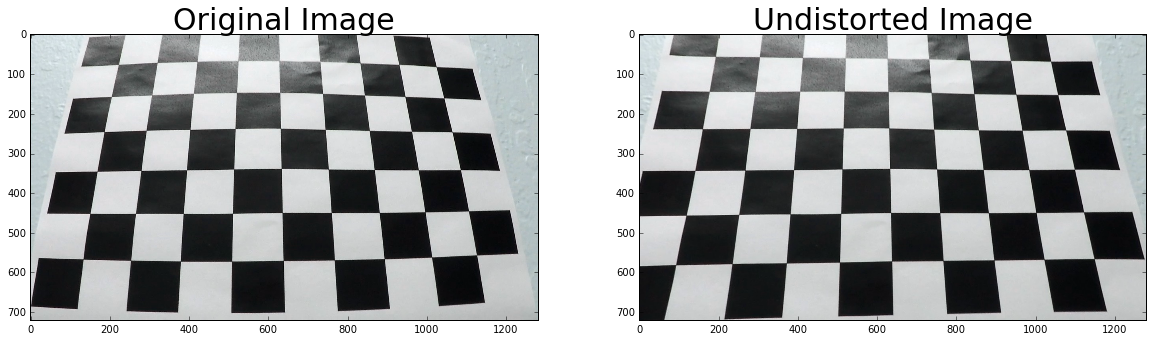

In [4]:
with open('camera_cal/camera_dist_pickle.p', 'rb') as fp:
    camera_dict = pickle.load(fp)
    
img = cv2.imread("camera_cal/calibration3.jpg")

dist = camera_dict['dist']
mtx = camera_dict['mtx']


dst = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

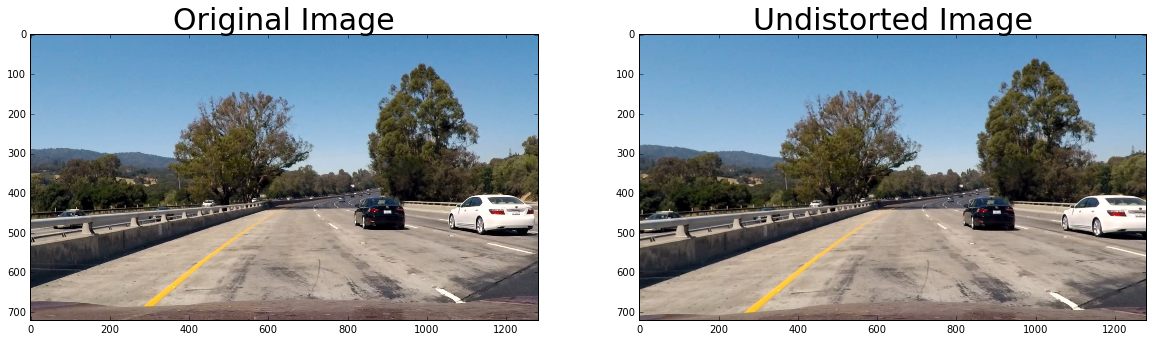

In [17]:
img = plt.imread("test_images/test1.jpg")
dist = camera_dict['dist']
mtx = camera_dict['mtx']


dst = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)